
✅ Дані успішно завантажено!

 Дані підготовлені: категоріальні змінні закодовані, числові масштабовані.

 Дані розбиті: 80% - навчальна вибірка, 20% - тестова.

 MSE (один X): 0.54661
 R2 Score (один X): 0.37076

 MSE (кілька X): 0.28774
 R2 Score (кілька X): 0.66876

 Найкращий alpha для Ridge: 2.154434690031882

 MSE (Ridge): 0.28834
 R2 Score (Ridge): 0.66807

 Найкращий alpha для Lasso: 0.001

 MSE (Lasso): 0.28822
 R2 Score (Lasso): 0.66821



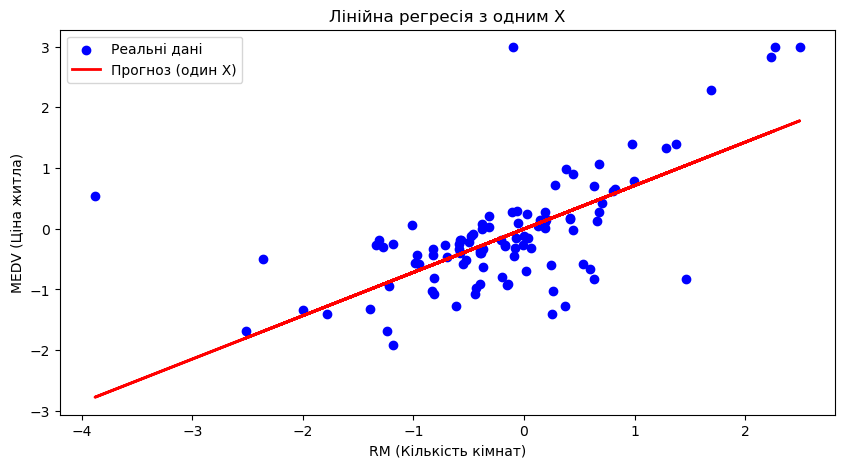

 Найкраща модель: Мультифакторна з R² = 0.66876


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Завантаження власних даних
df = pd.read_csv("boston.csv")
print("\n✅ Дані успішно завантажено!\n")

# 2. Попередня підготовка даних
le = LabelEncoder()
df['CHAS'] = le.fit_transform(df['CHAS'])  # Перетворення категоріальних змінних
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)
print(" Дані підготовлені: категоріальні змінні закодовані, числові масштабовані.\n")

# Визначаємо вхідні ознаки та цільову змінну
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# 3. Розбиття на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(" Дані розбиті: 80% - навчальна вибірка, 20% - тестова.\n")

# 4. Лінійна регресія
# 4.1. Регресія з одним X (RM - кількість кімнат)
X_single = X[['RM']]
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

single_lr = LinearRegression()
single_lr.fit(X_train_single, y_train)
y_pred_single = single_lr.predict(X_test_single)

# Оцінка моделі
print(f" MSE (один X): {mean_squared_error(y_test, y_pred_single):.5f}")
print(f" R2 Score (один X): {r2_score(y_test, y_pred_single):.5f}\n")

# 4.2. Регресія з кількома X
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)
y_pred_multi = multi_lr.predict(X_test)

# Оцінка моделі
print(f" MSE (кілька X): {mean_squared_error(y_test, y_pred_multi):.5f}")
print(f" R2 Score (кілька X): {r2_score(y_test, y_pred_multi):.5f}\n")

# 5. Регуляризація: Ridge та Lasso
param_grid = {'alpha': np.logspace(-3, 3, 10)}

# Ridge регресія
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
print(f" Найкращий alpha для Ridge: {grid_search_ridge.best_params_['alpha']}\n")
print(f" MSE (Ridge): {mean_squared_error(y_test, y_pred_ridge):.5f}")
print(f" R2 Score (Ridge): {r2_score(y_test, y_pred_ridge):.5f}\n")

# Lasso регресія
grid_search_lasso = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
print(f" Найкращий alpha для Lasso: {grid_search_lasso.best_params_['alpha']}\n")
print(f" MSE (Lasso): {mean_squared_error(y_test, y_pred_lasso):.5f}")
print(f" R2 Score (Lasso): {r2_score(y_test, y_pred_lasso):.5f}\n")

# 6. Візуалізація моделей
plt.figure(figsize=(10, 5))
plt.scatter(X_test_single, y_test, color='blue', label='Реальні дані')
plt.plot(X_test_single, y_pred_single, color='red', linewidth=2, label='Прогноз (один X)')
plt.xlabel("RM (Кількість кімнат)")
plt.ylabel("MEDV (Ціна житла)")
plt.legend()
plt.title("Лінійна регресія з одним X")
plt.show()

# 7. Вибір найкращої моделі
models = {"Однофакторна": r2_score(y_test, y_pred_single),
          "Мультифакторна": r2_score(y_test, y_pred_multi),
          "Ridge": r2_score(y_test, y_pred_ridge),
          "Lasso": r2_score(y_test, y_pred_lasso)}

best_model = max(models, key=models.get)
print(f" Найкраща модель: {best_model} з R² = {models[best_model]:.5f}")